## Linear Algebra with Numpy 
(`numpy.linalg`)

![](IMG/linalg.png)

Referencias: https://numpy.org/doc/stable/reference/routines.linalg.html

In [2]:
import numpy as np
import numpy.linalg as la

#### Producto de matrices: 
* Con el operador (`@`)  
* Con `np.matmul`
* Con `np.dot`

In [3]:
array1 = np.array([[1,2],[4,5]])
array2 = np.array([[1,2],[4,5]])
arrayr = array1 @ array2
print(f"Producto con el operador(@) \n{arrayr}")
arrayr = np.matmul(array1,array2)
print(f"Producto con np.matmul\n{arrayr}")
arrayr = np.dot(array1,array2)
print(f"Producto con np.dot\n{arrayr}")

Producto con el operador(@) 
[[ 9 12]
 [24 33]]
Producto con np.matmul
[[ 9 12]
 [24 33]]
Producto con np.dot
[[ 9 12]
 [24 33]]


#### Producto de varias matrices con (`la.multidot`)
Si el primer argumento es 1-D, se trata como un vector de fila. Si el último argumento es 1-D, se trata como un vector de columna. Los otros argumentos deben ser 2-D.

In [4]:
arrayr = la.multi_dot([array1,array2,array1])
print(arrayr)

[[ 57  78]
 [156 213]]


### Transpuesta con (`np.matrix_transpose`)

In [5]:
t = np.transpose(arrayr)
print(t)

[[ 57 156]
 [ 78 213]]


#### Producto interno y externo con (`inner`) & (`outer`)

In [6]:
arrayr = np.inner(array1,array2)
print(f"Producto interno: \n{arrayr}")
arrayr = np.outer(array1,array2)
print(f"Producto externo: \n{arrayr}")

Producto interno: 
[[ 5 14]
 [14 41]]
Producto externo: 
[[ 1  2  4  5]
 [ 2  4  8 10]
 [ 4  8 16 20]
 [ 5 10 20 25]]


#### Potencia con (`la.matrix_power`)

In [7]:
arrayr = la.matrix_power(array1, 2)
print(arrayr)

[[ 9 12]
 [24 33]]


### Determinante con (`la.det`)

In [8]:
a = np.array([[1, 2], [3, 4]])
np.linalg.det(a)

-2.0000000000000004

### Rango con (`la.matrix.rank`)

In [9]:
la.matrix_rank(a)

2

### Traza con (`np.trace`)

In [10]:
np.trace(a)

5

### Resolver un SEL con (`la.solve`)

In [11]:
a = np.array([[1, 2], [3, 5]])
b = np.array([1, 2])
x = np.linalg.solve(a, b)
x

array([-1.,  1.])

### Inversa con (`la.inv`) y pseudoinversa con (`la.pinv`)
#### (evitar)

### Valores propios con (`la.eigvals`)

In [12]:
D = np.diag((-1,1))
la.eigvals(D)

array([-1.,  1.])

#### Producto de Kronecker con (`np.kron`)
En matemáticas, se llama producto de Kronecker, denotado con 
$\displaystyle \otimes$, a una operación sobre dos matrices de tamaño arbitrario que da como resultado una matriz bloque. 


Ejemplo:
$$\displaystyle {\begin{bmatrix}1&2\\3&1\\\end{bmatrix}}\otimes {\begin{bmatrix}0&3\\2&1\\\end{bmatrix}}={\begin{bmatrix}1\cdot 0&1\cdot 3&2\cdot 0&2\cdot 3\\1\cdot 2&1\cdot 1&2\cdot 2&2\cdot 1\\3\cdot 0&3\cdot 3&1\cdot 0&1\cdot 3\\3\cdot 2&3\cdot 1&1\cdot 2&1\cdot 1\\\end{bmatrix}}={\begin{bmatrix}0&3&0&6\\2&1&4&2\\0&9&0&3\\6&3&2&1\end{bmatrix}}$$

In [13]:
kron = np.kron(array1,array2)
print(kron)

[[ 1  2  2  4]
 [ 4  5  8 10]
 [ 4  8  5 10]
 [16 20 20 25]]


#### Descomposicion de Cholesky con (`la.cholesky`)
La descomposición de Cholesky se usa principalmente para hallar la solución numérica de ecuaciones lineales $Ax = b$. Si $A$ es simétrica y positiva definida, entonces se puede solucionar $Ax = b$ calculando primero la descomposición de Cholesky $A = LLT$, luego resolviendo $Ly = b$ para y, y finalmente resolviendo $L^{T}x = y$ para x.



In [14]:
A = np.array([[1,-2j],[2j,5]])
L = la.cholesky(A)
print(L)

[[1.+0.j 0.+0.j]
 [0.+2.j 1.+0.j]]


### Factorizacion QR con (`la.qr`)
La descomposición QR de una matriz cuadrada real A es $\displaystyle A=QR,\,$
donde $Q$ es una matriz ortogonal $(Q^{T}Q = I )$ y $R$ es una matriz triangular superior.

In [15]:
a = np.random.randn(9, 6)
Q, R = np.linalg.qr(a)
print(np.allclose(a, np.dot(Q, R))) # a does equal QR



True


### Minimos cuadrados con (`la.lstsq`)

/tmp/ipykernel_52746/3371619338.py:4: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.
  m, c = np.linalg.lstsq(A, y)[0]


0.9999999999999999 -0.9499999999999997


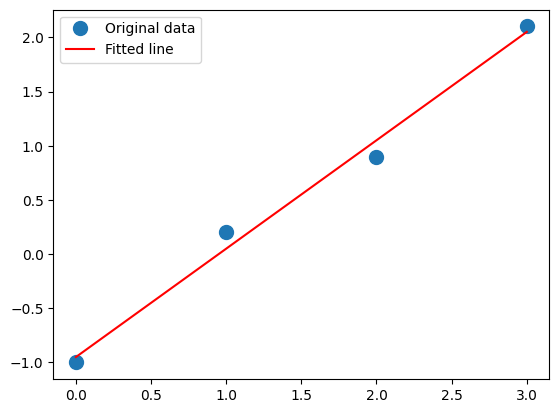

In [19]:
x = np.array([0, 1, 2, 3])
y = np.array([-1, 0.2, 0.9, 2.1])
A = np.vstack([x, np.ones(len(x))]).T
m, c = np.linalg.lstsq(A, y)[0]
print(m, c)
import matplotlib.pyplot as plt
_ = plt.plot(x, y, 'o', label='Original data', markersize=10)
_ = plt.plot(x, m*x + c, 'r', label='Fitted line')
_ = plt.legend()
plt.show()

### Norma con (`la.norm`)
Normas disponibles por medio del parametro `ord`:

![Norms](IMG/norms.png)

In [17]:
a = np.arange(9) - 4
b = a.reshape((3, 3))
      
print(la.norm(a))
print(la.norm(b))

7.745966692414834
7.745966692414834


### Numero de condicion de una matriz con (`la.cond`)